In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
big_data = pd.read_csv("Train.csv")

In [69]:
big_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2898,NCJ30,5.820,Low Fat,0.000000,Household,169.3790,OUT013,1987,High,Tier 3,Supermarket Type1,2376.9060
2708,NCE30,16.000,Low Fat,0.099117,Household,210.7902,OUT035,2004,Small,Tier 2,Supermarket Type1,4460.1942
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
7250,FDT24,12.350,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,NaN,Tier 3,Grocery Store,154.4656
8460,FDN39,19.350,Regular,0.065508,Meat,168.9816,OUT035,2004,Small,Tier 2,Supermarket Type1,2852.2872


In [70]:
big_data.shape

(8523, 12)

In [71]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [72]:
big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [73]:
#Handling missing values

# Mean ---> Item_Weight
#Mode ----> Outlet_Size

In [74]:
big_data["Item_Weight"].mean()

12.857645184135976

In [75]:
big_data["Item_Weight"].fillna(big_data["Item_Weight"].mean(),inplace = True)

In [76]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [77]:
mode_outlet_size = big_data.pivot_table(values = "Outlet_Size",columns = "Outlet_Type",aggfunc = (lambda x: x.mode()[0]))

In [78]:
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [79]:
missing_val = big_data["Outlet_Size"].isnull()

In [80]:
missing_val

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [81]:
big_data.loc[missing_val,'Outlet_Size'] = big_data.loc[missing_val,'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [82]:
big_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [83]:
#Data Analysis

In [84]:
big_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\VARUN\AppData\Local\Temp\ipykernel_22844\2453438332.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_data['Item_Weight'],axlabel = "Item Weight")


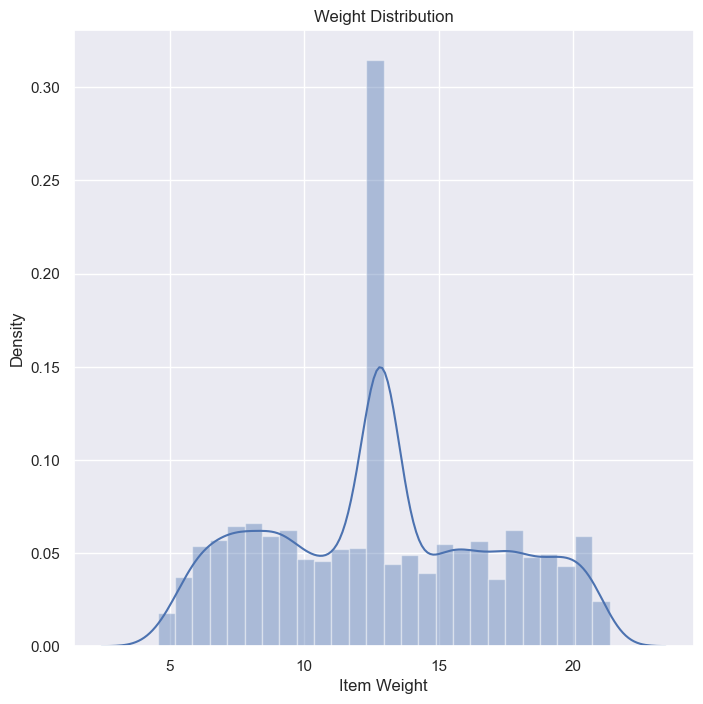

In [89]:
#item-Weight distribution
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(big_data['Item_Weight'],axlabel = "Item Weight")
plt.title("Weight Distribution")
plt.show()

C:\Users\VARUN\AppData\Local\Temp\ipykernel_22844\215496075.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_data['Item_Visibility'],axlabel = "Item Visibility")


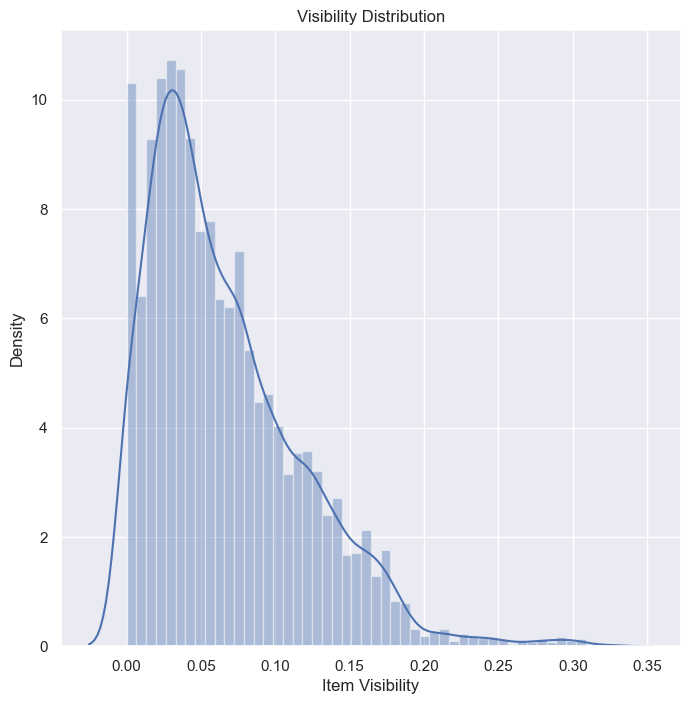

In [91]:
plt.figure(figsize=(8,8))
sns.distplot(big_data['Item_Visibility'],axlabel = "Item Visibility")
plt.title("Visibility Distribution")
plt.show()

C:\Users\VARUN\AppData\Local\Temp\ipykernel_22844\388391008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_data['Item_MRP'],axlabel ="Item MRP")


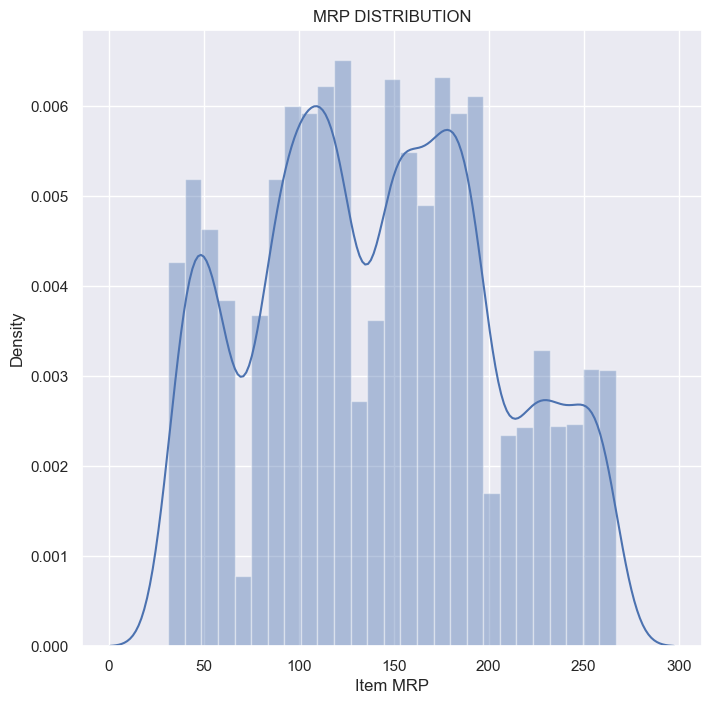

In [93]:
plt.figure(figsize=(8,8))
sns.distplot(big_data['Item_MRP'],axlabel ="Item MRP")
plt.title("MRP DISTRIBUTION")
plt.show()

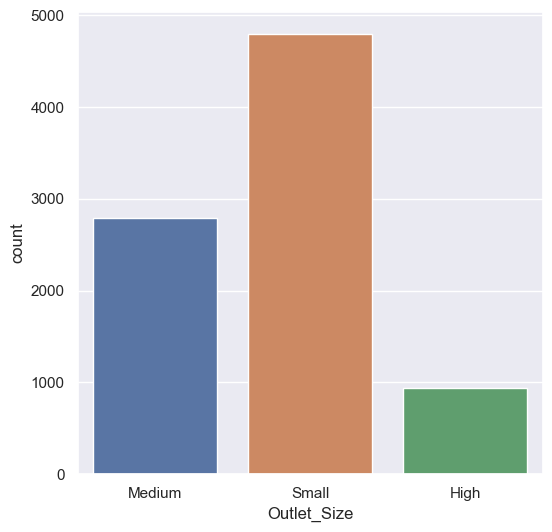

In [98]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_data)
plt.show()

C:\Users\VARUN\AppData\Local\Temp\ipykernel_22844\191192565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_data['Item_Outlet_Sales'],axlabel = "Item Outlet Sales")


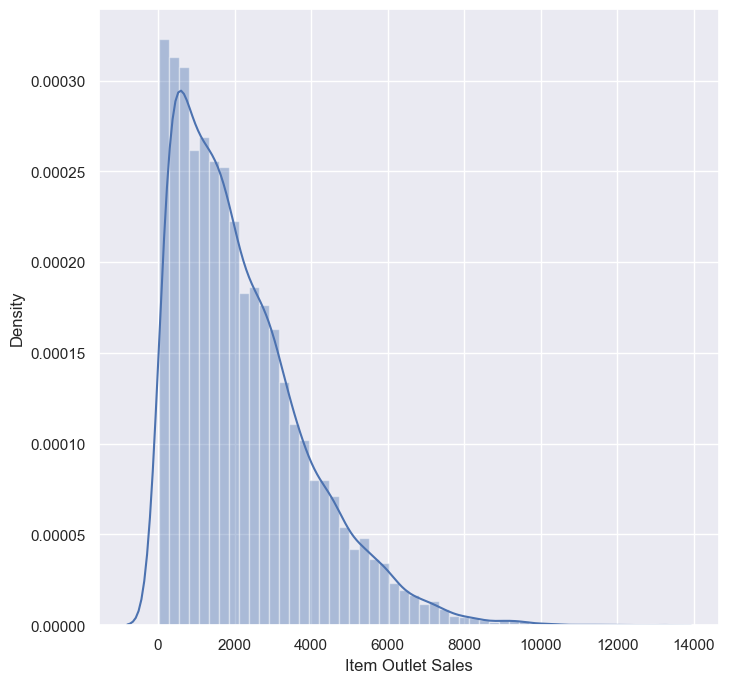

In [99]:
plt.figure(figsize=(8,8))
sns.distplot(big_data['Item_Outlet_Sales'],axlabel = "Item Outlet Sales")
plt.show()

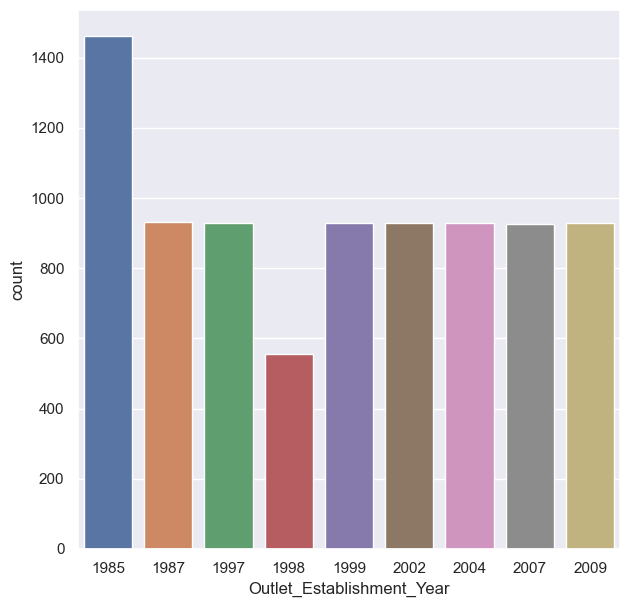

In [100]:
plt.figure(figsize=(7,7))
sns.countplot(x = big_data['Outlet_Establishment_Year'])
plt.show()

In [34]:
#categorical features

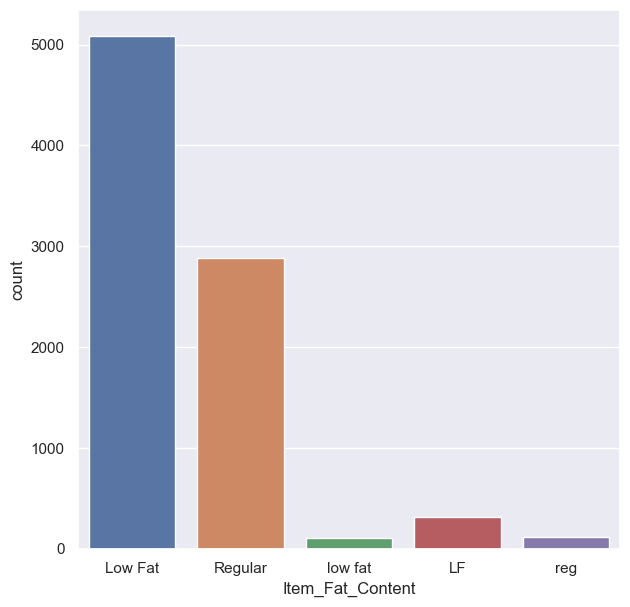

In [101]:
plt.figure(figsize=(7,7))
sns.countplot(x = big_data['Item_Fat_Content'])
plt.show()

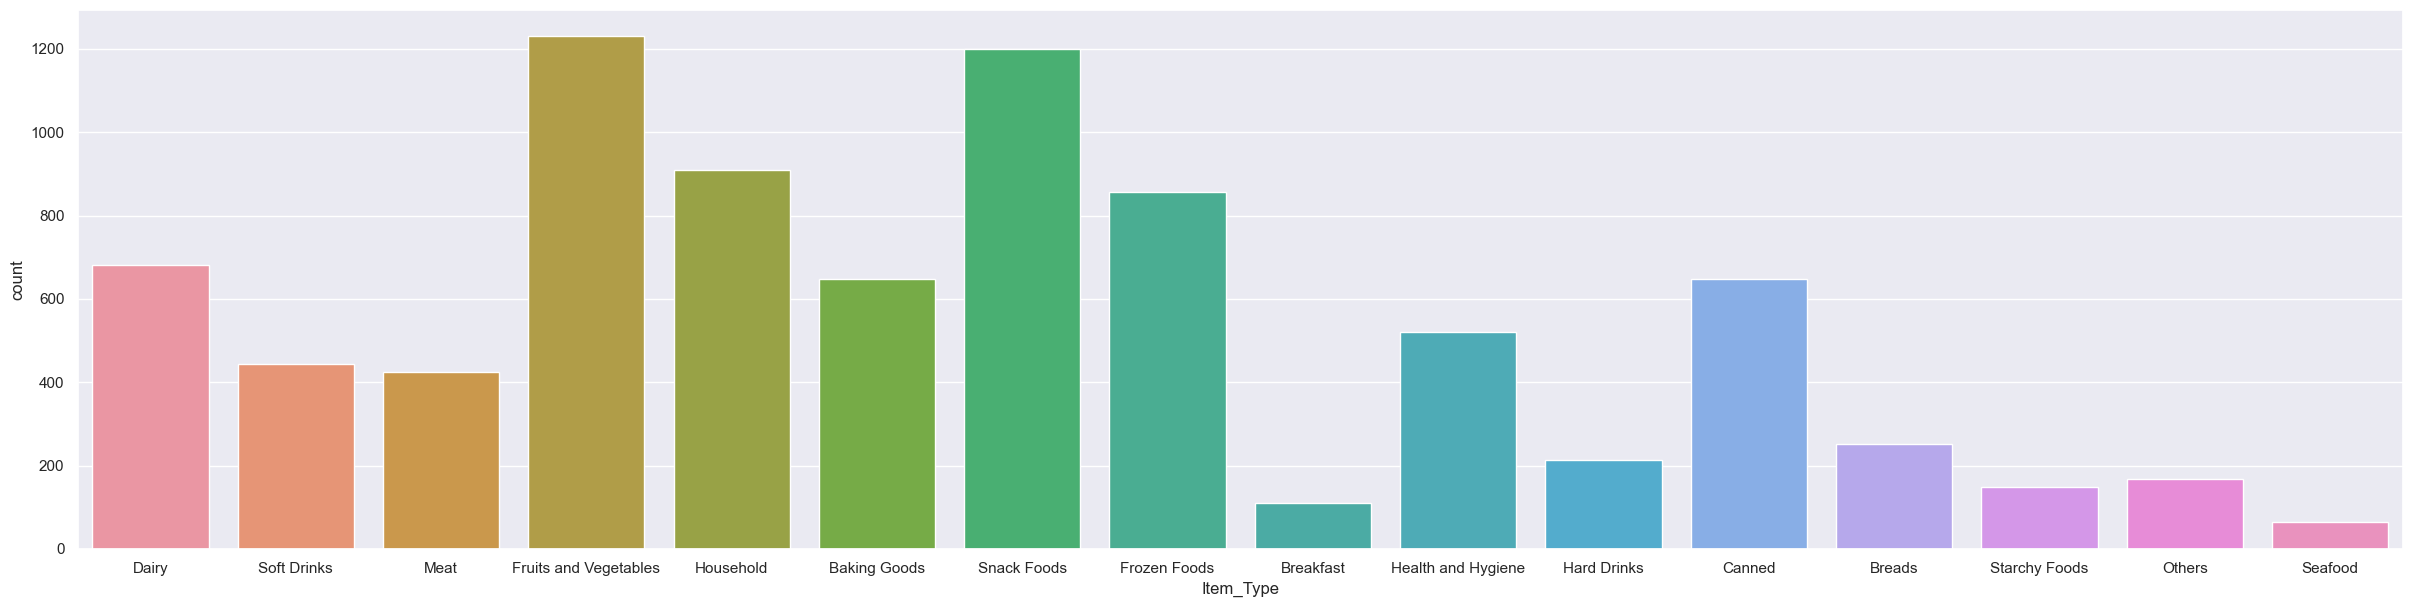

In [102]:
plt.figure(figsize=(30,7))
sns.countplot(x = big_data['Item_Type'])
plt.show()

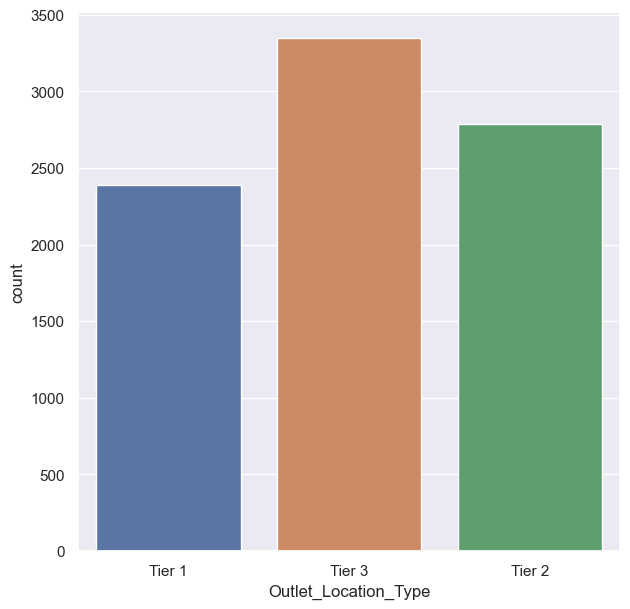

In [103]:
plt.figure(figsize=(7,7))
sns.countplot(x = big_data['Outlet_Location_Type'])
plt.show()

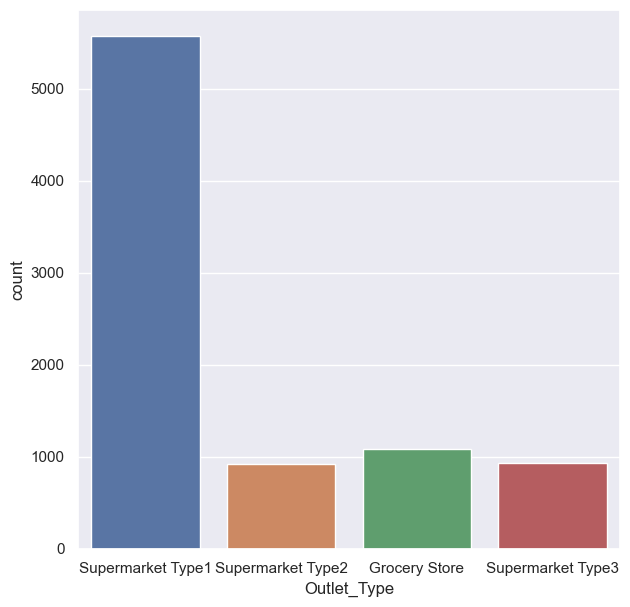

In [45]:
#Outlet_Type
plt.figure(figsize=(7,7))
sns.countplot(x = big_data['Outlet_Type'])
plt.show()

In [46]:
#data preprocessing

In [104]:
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [105]:
big_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [106]:
big_data.replace({"Item_Fat_Content":{"low fat" : "Low Fat","LF" : "Low Fat","reg" : "Regular"}},inplace = True)

In [107]:
big_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
encoder = LabelEncoder()

In [110]:
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
big_data["Item_Identifier"] = encoder.fit_transform(big_data["Item_Identifier"])

In [112]:
big_data["Item_Fat_Content"] = encoder.fit_transform(big_data["Item_Fat_Content"])
big_data["Item_Type"] = encoder.fit_transform(big_data["Item_Type"])
big_data["Outlet_Identifier"] = encoder.fit_transform(big_data["Outlet_Identifier"])
big_data["Outlet_Size"] = encoder.fit_transform(big_data["Outlet_Size"])
big_data["Outlet_Location_Type"] = encoder.fit_transform(big_data["Outlet_Location_Type"])
big_data["Outlet_Type"] = encoder.fit_transform(big_data["Outlet_Type"])

In [113]:
big_data["Outlet_Size"].value_counts()

2    4798
1    2793
0     932
Name: Outlet_Size, dtype: int64

In [117]:
#splitting the data

In [118]:
X = big_data.drop(columns = "Item_Outlet_Sales",axis = 1)
y = big_data["Item_Outlet_Sales"]

In [119]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [120]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
regressor = LinearRegression()

In [126]:
regressor.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred = regressor.predict(X_train)

In [135]:
y_pred

array([2412.79920114, 3057.08179773, 3947.60089799, ..., 2448.23503665,
       2236.15045471, 3116.28956971])

In [140]:
from sklearn.metrics import r2_score

In [143]:
r2_s = r2_score(y_train,y_pred)

In [152]:
r2_s

0.5071929167339232

In [147]:
from xgboost import XGBRegressor


In [148]:
xregressor = XGBRegressor()


In [149]:
xregressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
y_pred2 = xregressor.predict(X_train)

In [154]:
y_pred

array([2241.8008, 2784.4749, 3348.1802, ..., 2619.9922, 1810.6472,
       2076.5325], dtype=float32)

In [155]:
r2_s2 = r2_score(y_train,y_pred2)

In [156]:
r2_s2

0.8762174618111388